In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("data.csv")

In [4]:
import pandas as pd

# Combine DataFrames along rows (axis=0)
combined_df = pd.concat([train], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('data.csv', index=False)


In [5]:
print('Number of duplicates in train : ',sum(train.duplicated()))

Number of duplicates in train :  53788


In [6]:
print('Total number of missing values in train : ', train.isna().values.sum())

Total number of missing values in train :  0


In [8]:
print(train.columns)

Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 [Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

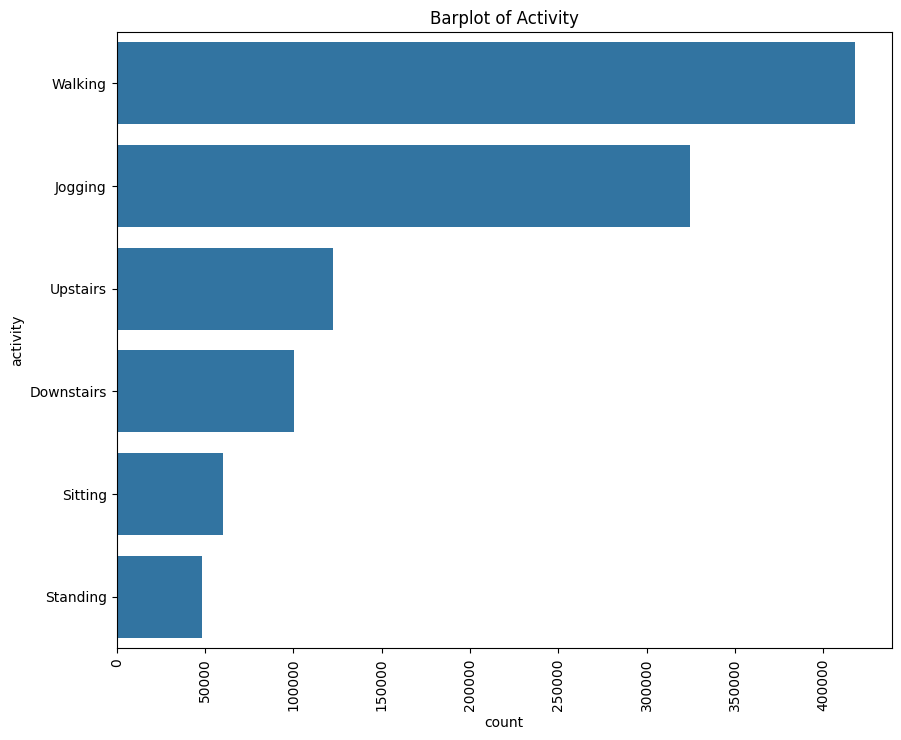

In [9]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.activity)
plt.xticks(rotation=90)

In [11]:
# train = train[train['Activity'] != 'DOWNSTAIRS']
# train = train[train['Activity'] != 'UPSTAIRS']
train = train[~train['activity'].isin(['DOWNSTAIRS', 'UPSTAIRS'])]



In [12]:
train.activity.value_counts()

activity
Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: count, dtype: int64

In [14]:
#test = test[test['Activity'] != 'DOWNSTAIRS']
#test = test[test['Activity'] != 'UPSTAIRS']
train = train[~train['activity'].isin(['Downstairs', 'Upstairs'])]


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['activity'] = le.fit_transform(train.activity)
train['activity'].sample(5)

C:\Users\b00960389\AppData\Local\Temp\ipykernel_1712\1070703841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['activity'] = le.fit_transform(train.activity)


882305     3
201600     0
1044742    3
43036      3
230104     3
Name: activity, dtype: int32

In [16]:
original_labels = le.inverse_transform([0,1,2,3])      # Only to know which one corresponds to each number

In [18]:
y_train = train.activity
X_train = train.drop(['activity'], axis=1)
print('Training data size : ', X_train.shape)

Training data size :  (850833, 5)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [20]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1'], 'multi_class': ['ovr']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
lr_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([10, 20, 30, 40, 50, 60]),
                                        'multi_class': ['ovr'],
                                        'penalty': ['l2', 'l1']},
                   random_state=42)

In [21]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    labels  = original_labels[lables] 
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()